In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
import warnings
from google.colab import files
uploaded = files.upload()
import io
warnings.simplefilter(action = "ignore") 

# Reading the data set
diabetes = pd.read_csv(io.BytesIO(uploaded['BDTS_IFR_Ion_Margarit_Adrian_Florin_Baza-de-date_Diabetici-India_BigData.csv']))

# First five points of the data set
diabetes.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving BDTS_IFR_Ion_Margarit_Adrian_Florin_Baza-de-date_Diabetici-India_BigData.csv to BDTS_IFR_Ion_Margarit_Adrian_Florin_Baza-de-date_Diabetici-India_BigData.csv


,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Dividing the data into test and train
X_train,X_test,y_train,y_test=train_test_split(diabetes.iloc[:,[0,1,2,3,4,5,6,7]], diabetes.iloc[:,[8]],test_size=0.2,random_state=1)

**Creating the pipelines**

Creation of pipelines for Logistic Regression, Decision Tree and Random Forest
The steps in the pipeline will include
1. Data preprocessing using MinMax Scaler
2. Dimensionality reduction using PCA
3. Training the respective models

In [ ]:
#Logistic Regression Pipeline
LogisticRegressionPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('logistic_classifier',LogisticRegression())])

In [ ]:
#Decision tree Pipeline
DecisionTreePipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])

In [ ]:
#Random Forest Pipeline
RandomForestPipeline=Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=3)),
                     ('randomforest_classifier',RandomForestClassifier())])

**Info about the data set**

In [ ]:
diabetes.shape

(768, 9)

In [ ]:
# Info about the data set
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_pregnancies        768 non-null    int64  
 1   Glucose_Concentration        768 non-null    int64  
 2   Blood_pressure               768 non-null    int64  
 3   Triceps_skin_fold_thickness  768 non-null    int64  
 4   Insulin                      768 non-null    int64  
 5   Body_mass_index              768 non-null    float64
 6   Diabetes_pedigree_function   768 non-null    float64
 7   Age_in_years                 768 non-null    int64  
 8   Outcome                      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Descriptive statistics on the data set
diabetes.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Number_of_pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose_Concentration,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
Blood_pressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
Triceps_skin_fold_thickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
Body_mass_index,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
Diabetes_pedigree_function,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age_in_years,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [ ]:
# Distribution of results
diabetes["Outcome"].value_counts()*100/len(diabetes)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [ ]:
# The number of sick(1) and healthy(0) people
diabetes.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

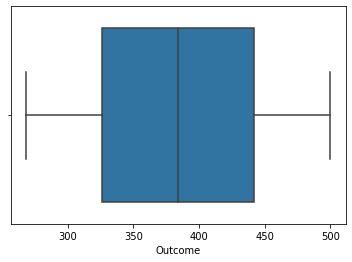

In [ ]:
sns.boxplot(x = diabetes.Outcome.value_counts())

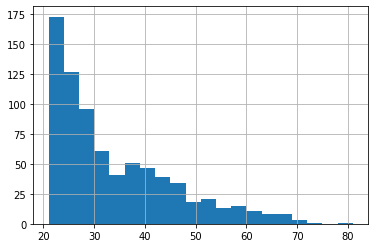

In [ ]:
# Histogram of the age variable
%matplotlib inline
diabetes['Age_in_years'].hist(bins=20)

In [ ]:
# Maximum and minimum age of patients
print("Max Age: " + str(diabetes["Age_in_years"].max()) + " Min Age: " + str(diabetes["Age_in_years"].min()))

Max Age: 81 Min Age: 21


In [ ]:
# The result according to an average of the tasks
diabetes.groupby("Outcome").agg({"Number_of_pregnancies":"mean"})

,Number_of_pregnancies
Outcome,
0,3.298000
1,4.865672


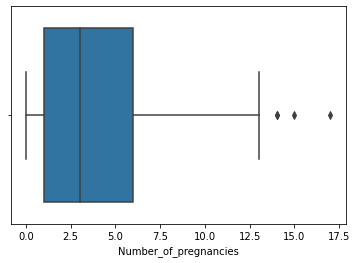

In [ ]:
sns.boxplot(x = diabetes["Number_of_pregnancies"])

In [ ]:
# The result according to the average age
diabetes.groupby("Outcome").agg({"Age_in_years":"mean"})

,Age_in_years
Outcome,
0,31.190000
1,37.067164


In [ ]:
# The result depends on the maximum age
diabetes.groupby("Outcome").agg({"Age_in_years":"max"})

,Age_in_years
Outcome,
0,81
1,70


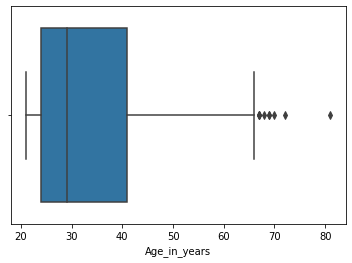

In [ ]:
sns.boxplot(x = diabetes["Age_in_years"])

In [ ]:
# The result according to an average of the amount of insulin
diabetes.groupby("Outcome").agg({"Insulin": "mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [ ]:
# The result depends on the maximum insulin
diabetes.groupby("Outcome").agg({"Insulin": "max"})

,Insulin
Outcome,
0,744
1,846


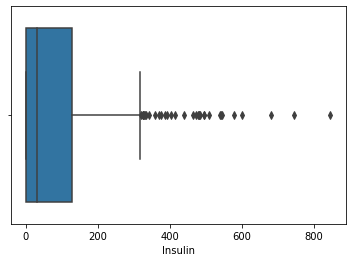

In [ ]:
sns.boxplot(x = diabetes["Insulin"])

In [ ]:
# The result depends on the average blood glucose concentration
diabetes.groupby("Outcome").agg({"Glucose_Concentration": "mean"})

,Glucose_Concentration
Outcome,
0,109.980000
1,141.257463


In [ ]:
# The result depends on the maximum concentration of glucose in the blood
diabetes.groupby("Outcome").agg({"Glucose_Concentration": "max"})

,Glucose_Concentration
Outcome,
0,197
1,199


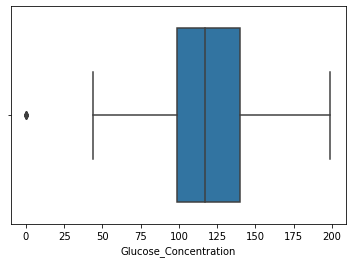

In [ ]:
sns.boxplot(x = diabetes["Glucose_Concentration"])

In [ ]:
# The result according to the average body weight
diabetes.groupby("Outcome").agg({"Body_mass_index": "mean"})

,Body_mass_index
Outcome,
0,30.304200
1,35.142537


In [ ]:
# The result depends on the maximum body weight
diabetes.groupby("Outcome").agg({"Body_mass_index": "max"})

,Body_mass_index
Outcome,
0,57.3
1,67.1


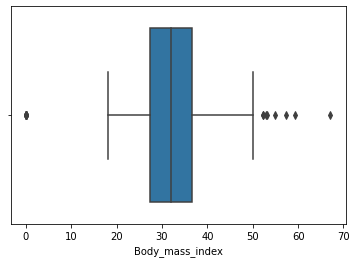

In [ ]:
sns.boxplot(x = diabetes["Body_mass_index"])

(None, None)

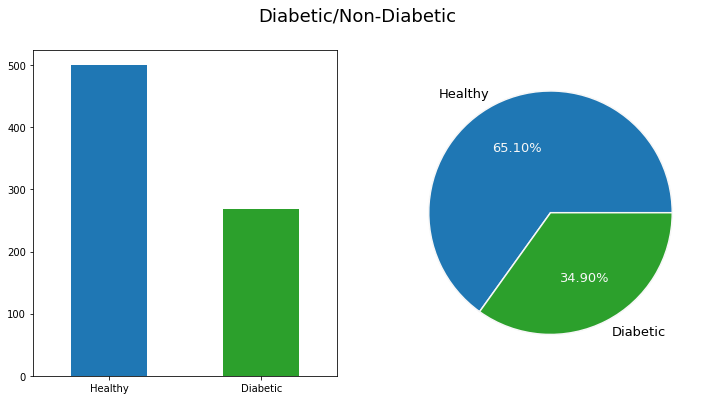

In [ ]:
# Distribution of results
f, ax = plt.subplots(1, 2, figsize = (12, 6))
f.suptitle("Diabetic/Non-Diabetic", fontsize = 18.)
_ = diabetes.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, 
                                            color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["Healthy", "Diabetic"])
_ = diabetes.Outcome.value_counts().plot.pie(labels = ("Healthy", "Diabetic"), autopct = "%.2f%%", 
                                            label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), 
ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

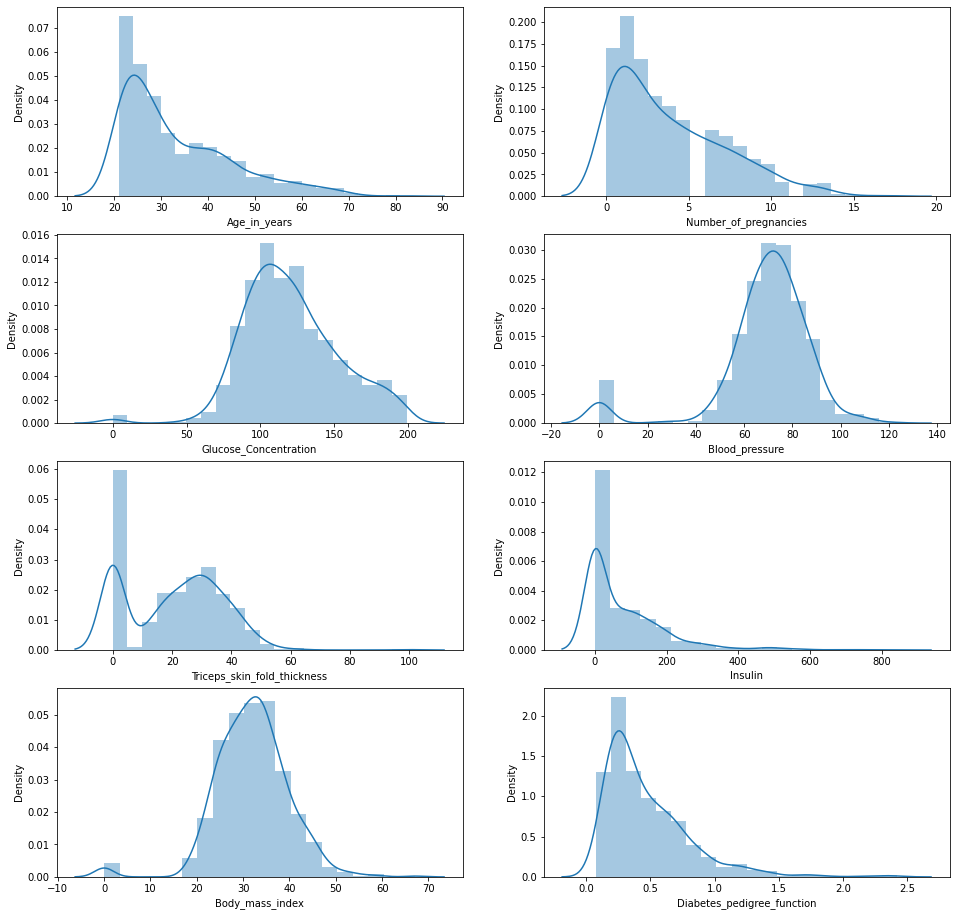

In [ ]:
# Distribution of results according to each entity
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(diabetes.Age_in_years, bins = 20, ax=ax[0,0]) 
sns.distplot(diabetes.Number_of_pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(diabetes.Glucose_Concentration, bins = 20, ax=ax[1,0]) 
sns.distplot(diabetes.Blood_pressure, bins = 20, ax=ax[1,1]) 
sns.distplot(diabetes.Triceps_skin_fold_thickness, bins = 20, ax=ax[2,0])
sns.distplot(diabetes.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(diabetes.Body_mass_index, bins = 20, ax=ax[3,0]) 
sns.distplot(diabetes.Diabetes_pedigree_function, bins = 20, ax=ax[3,1])

In [ ]:
# I analyzed the relationship between all the entities
# The correlation between the entities is positive if it is greater than 0
# If the value of a single entity increases, then the others will also increase
# If the correlation is equal to 0, then it is non-existent
# Correlation is negative if it is less than 0, in which case if one entity increases, the others will decrease
# From here we can see that if the Glucose_Concentration entity increases, then the Outcome will also increase

diabetes.corr()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,Outcome
Number_of_pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose_Concentration,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Triceps_skin_fold_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Body_mass_index,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_pedigree_function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age_in_years,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


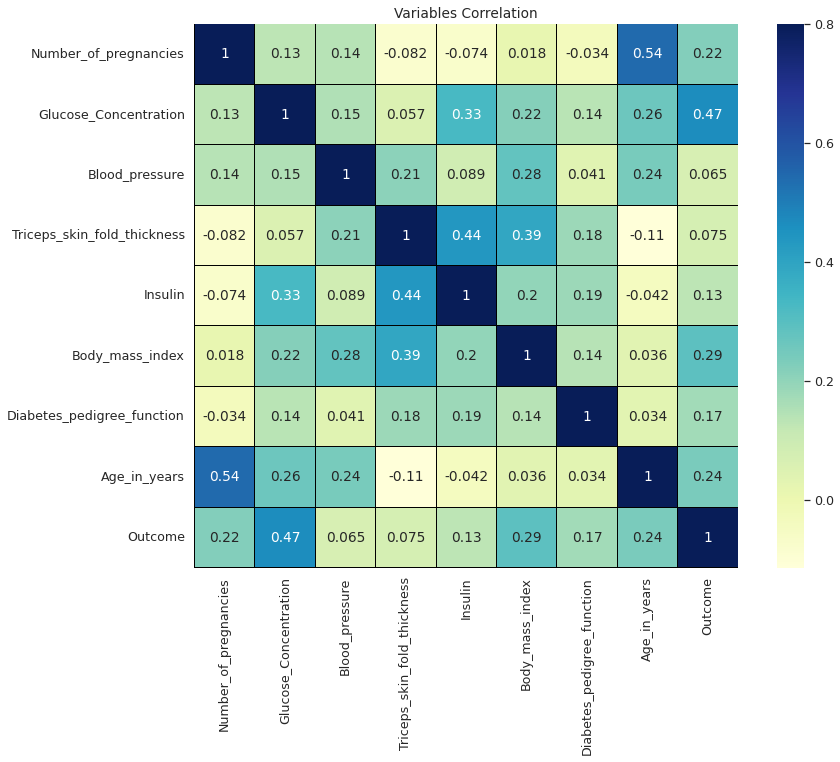

In [ ]:
# Correlation between entities
corr=diabetes.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Variables Correlation');

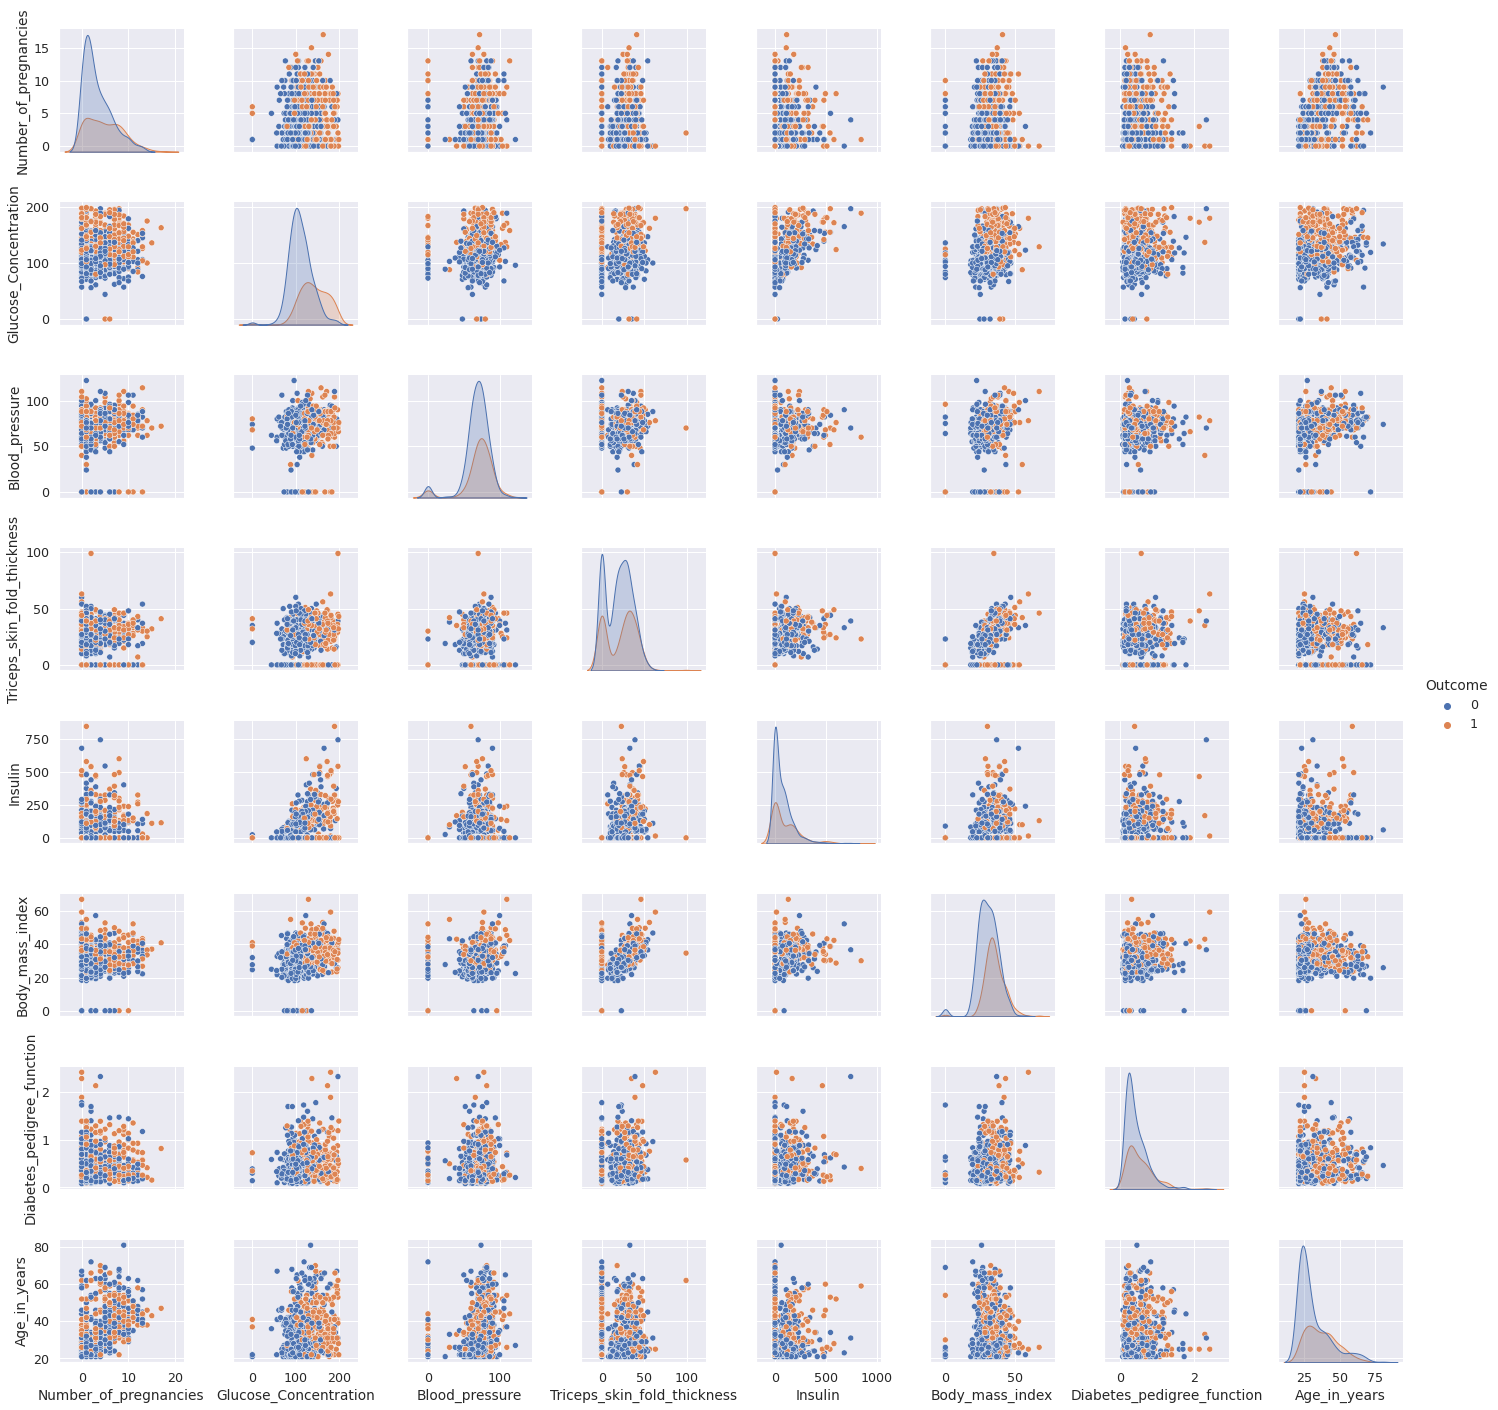

In [ ]:
# Distribution of patients - diabetic(1)/healthy(0) - per entity
sns.pairplot(data = diabetes, hue = 'Outcome')
plt.show()

**Preprocessing the data**

In [ ]:
# In diabetes.head() we could see that some values ​​contained 0, which means that there were missing values
diabetes[['Glucose_Concentration','Blood_pressure','Triceps_skin_fold_thickness','Insulin','Body_mass_index']] = diabetes[['Glucose_Concentration','Blood_pressure','Triceps_skin_fold_thickness','Insulin','Body_mass_index']].replace(0,np.NaN)
diabetes.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# Now we can see the missing values
diabetes.isnull().sum()

Number_of_pregnancies            0
Glucose_Concentration            5
Blood_pressure                  35
Triceps_skin_fold_thickness    227
Insulin                        374
Body_mass_index                 11
Diabetes_pedigree_function       0
Age_in_years                     0
Outcome                          0
dtype: int64

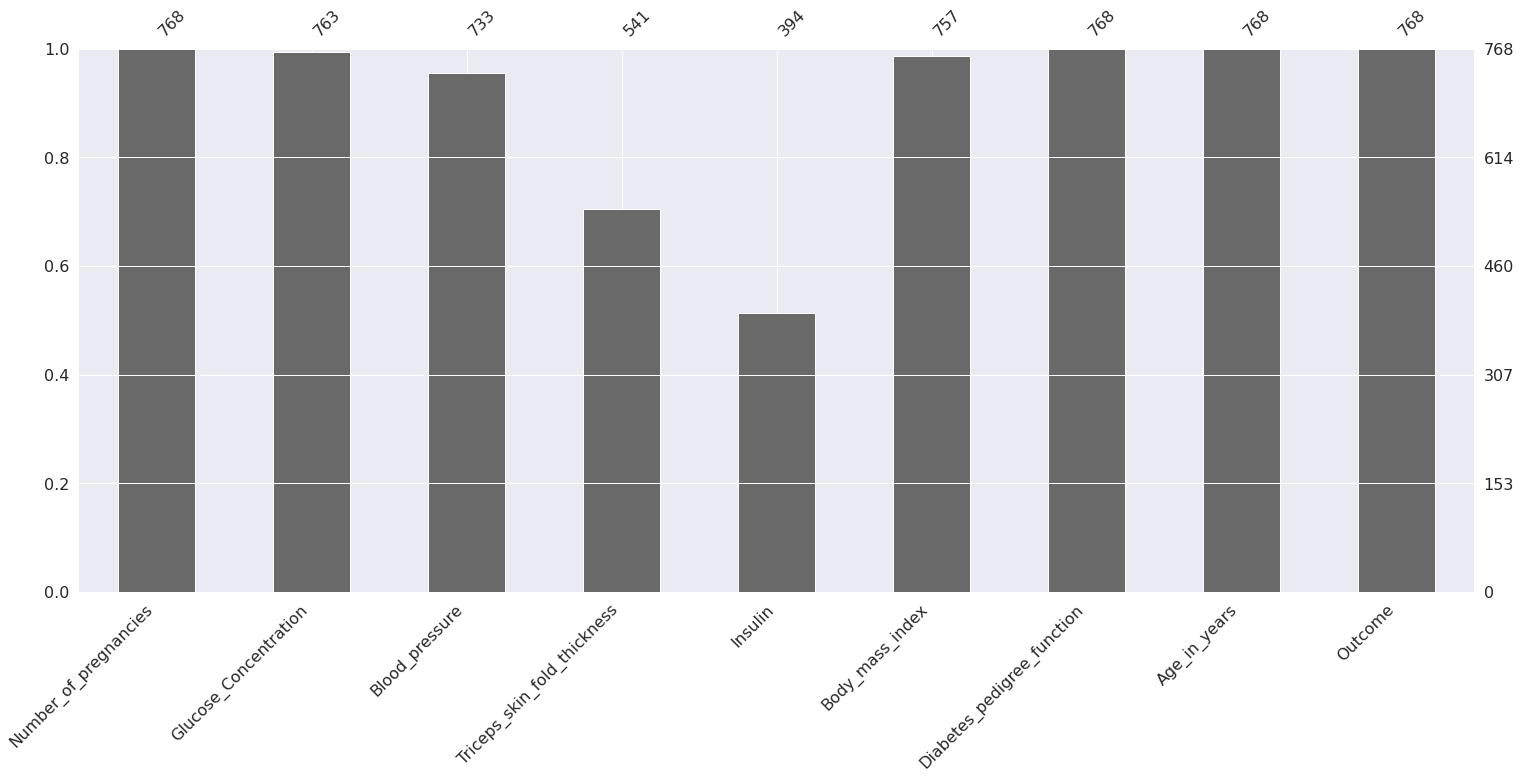

In [ ]:
# Now we can see the values ​​using the missingno library for viewing missing observations
import missingno as msno
msno.bar(diabetes)

In [ ]:
# The missing values ​​will be filled with the mean values ​​of each variable
def median_target(var):   
    temp = diabetes[diabetes[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby([var, 'Outcome']).mean().reset_index()
    return temp

In [ ]:
# The missing values ​​will be filled with the mean values ​​of each variable
columns = diabetes.columns.drop('Outcome')
for i in columns:
    median_target(i)
    diabetes.loc[(diabetes['Outcome'] == 0 ) & (diabetes[i].isnull()), i] = median_target(i)[i][0]
    diabetes.loc[(diabetes['Outcome'] == 1 ) & (diabetes[i].isnull()), i] = median_target(i)[i][1]

In [ ]:
diabetes.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,Outcome
0,6,148.0,72.0,35.0,14.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,14.0,26.6,0.351,31,0
2,8,183.0,64.0,7.0,14.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
# The missing values ​​have been filled
diabetes.isnull().sum()

Number_of_pregnancies          0
Glucose_Concentration          0
Blood_pressure                 0
Triceps_skin_fold_thickness    0
Insulin                        0
Body_mass_index                0
Diabetes_pedigree_function     0
Age_in_years                   0
Outcome                        0
dtype: int64

**Outlier observations analysis**

In [ ]:
# Within the data set, there were found to be a series of anomalous observations compared to 1/4 (25%) and 3/4 (75%) of the set

for feature in diabetes:
    
    Q1 = diabetes[feature].quantile(0.25)
    Q3 = diabetes[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if diabetes[(diabetes[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Number_of_pregnancies yes
Glucose_Concentration no
Blood_pressure yes
Triceps_skin_fold_thickness yes
Insulin yes
Body_mass_index yes
Diabetes_pedigree_function yes
Age_in_years yes
Outcome no


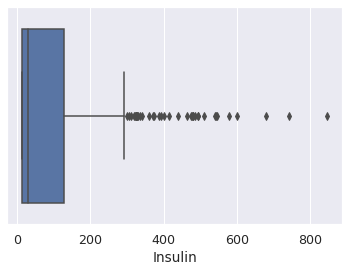

In [ ]:
# Now we can visualize the Insulin variable with the boxplot method. We find the outliers on the chart
sns.boxplot(x = diabetes["Insulin"]);

In [ ]:
# We performed an analysis for the Insulin variable and suppressed contradictory values
Q1 = diabetes.Insulin.quantile(0.25)
Q3 = diabetes.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
diabetes.loc[diabetes["Insulin"] > upper,"Insulin"] = upper

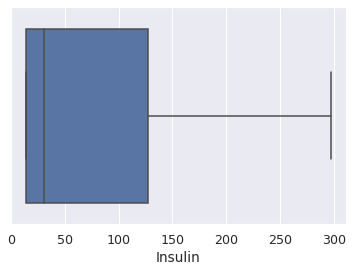

In [ ]:
sns.boxplot(x = diabetes["Insulin"]);

**Local outlier factor**

In [ ]:
# We determined outliers among all variables with the Local Outlier Factor method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetes)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
diabetes_scores = lof.negative_outlier_factor_
np.sort(diabetes_scores)[0:30]

array([-2.47962601, -2.1188006 , -2.00777936, -1.88029954, -1.81515314,
       -1.71639102, -1.68211031, -1.67434498, -1.61240288, -1.61000257,
       -1.57218846, -1.54935861, -1.54433131, -1.52089171, -1.49974458,
       -1.46653248, -1.46634293, -1.46425771, -1.44926639, -1.44875791,
       -1.43857892, -1.4316278 , -1.43093163, -1.42083664, -1.40885833,
       -1.40292133, -1.39766926, -1.37710494, -1.37353125, -1.36705018])

In [ ]:
# We choose the limit value according to the score of the abnormal local factor (local outlier factor)
threshold = np.sort(diabetes_scores)[7]
threshold

-1.6743449813511238

In [ ]:
# We delete those higher than the limit value
outlier = diabetes_scores > threshold
diabetes = diabetes[outlier]

In [ ]:
# Now we analyze the new shape that the data set has taken
diabetes.shape

(760, 9)

**Feature Engineering**

Due to the need to create new, logical variables for this data set, we created new variables based on Body_mass_index, Insulin and Glucose_Concentration

In [ ]:
# According to Body_mass_index, certain ranges have been determined and a series of categorical values ​​have been assigned
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obese 1", "Obese 2", "Obese 3"], dtype = "category")
diabetes["NewBMI"] = NewBMI
diabetes.loc[diabetes["Body_mass_index"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes.loc[(diabetes["Body_mass_index"] > 18.5) & (diabetes["Body_mass_index"] <= 24.9), "NewBMI"] = NewBMI[1]
diabetes.loc[(diabetes["Body_mass_index"] > 24.9) & (diabetes["Body_mass_index"] <= 29.9), "NewBMI"] = NewBMI[2]
diabetes.loc[(diabetes["Body_mass_index"] > 29.9) & (diabetes["Body_mass_index"] <= 34.9), "NewBMI"] = NewBMI[3]
diabetes.loc[(diabetes["Body_mass_index"] > 34.9) & (diabetes["Body_mass_index"] <= 39.9), "NewBMI"] = NewBMI[4]
diabetes.loc[diabetes["Body_mass_index"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [ ]:
diabetes.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,Outcome,NewBMI
0,6,148.0,72.0,35.0,14.0,33.6,0.627,50,1,Obese 1
1,1,85.0,66.0,29.0,14.0,26.6,0.351,31,0,Overweight
2,8,183.0,64.0,7.0,14.0,23.3,0.672,32,1,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese 3


In [ ]:
# According to the insulin value, a process of creating a categorical variable will take place
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
# The process has been added to the dataset
diabetes = diabetes.assign(NewInsulinScore=diabetes.apply(set_insulin, axis=1))

diabetes.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,Outcome,NewBMI,NewInsulinScore
0,6,148.0,72.0,35.0,14.0,33.6,0.627,50,1,Obese 1,Abnormal
1,1,85.0,66.0,29.0,14.0,26.6,0.351,31,0,Overweight,Abnormal
2,8,183.0,64.0,7.0,14.0,23.3,0.672,32,1,Normal,Abnormal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese 3,Abnormal


In [ ]:
# Certain intervals were determined according to Glucose_Concentration and categorical variables were assigned to them
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "None", "High"], dtype = "category")
diabetes["NewGlucose"] = NewGlucose
diabetes.loc[diabetes["Glucose_Concentration"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetes.loc[(diabetes["Glucose_Concentration"] > 70) & (diabetes["Glucose_Concentration"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetes.loc[(diabetes["Glucose_Concentration"] > 99) & (diabetes["Glucose_Concentration"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetes.loc[diabetes["Glucose_Concentration"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [ ]:
diabetes.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6,148.0,72.0,35.0,14.0,33.6,0.627,50,1,Obese 1,Abnormal,None
1,1,85.0,66.0,29.0,14.0,26.6,0.351,31,0,Overweight,Abnormal,Normal
2,8,183.0,64.0,7.0,14.0,23.3,0.672,32,1,Normal,Abnormal,None
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Normal,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese 3,Abnormal,None


**One Hot Encoding**

Certain categorical variables in this data set had to be transformed into numerical values

In [ ]:
# Now, through the One Hot Encoding transformations, the categorical variables have been converted into numerical values
diabetes = pd.get_dummies(diabetes, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [ ]:
diabetes.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,Outcome,NewBMI_Obese 1,NewBMI_Obese 2,NewBMI_Obese 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_None,NewGlucose_Normal,NewGlucose_Overweight
0,6,148.0,72.0,35.0,14.0,33.6,0.627,50,1,1,0,0,0,0,0,0,1,0,0
1,1,85.0,66.0,29.0,14.0,26.6,0.351,31,0,0,0,0,1,0,0,0,0,1,0
2,8,183.0,64.0,7.0,14.0,23.3,0.672,32,1,0,0,0,0,0,0,0,1,0,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0,0,1,0,1,0,0,1,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0,1,0,0,0,0,1,0,0


In [ ]:
categorical_diabetes = diabetes[['NewBMI_Obese 1','NewBMI_Obese 2', 'NewBMI_Obese 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_None']]

In [ ]:
categorical_diabetes.head()

,NewBMI_Obese 1,NewBMI_Obese 2,NewBMI_Obese 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_None
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [ ]:
y = diabetes["Outcome"]
X = diabetes.drop(["Outcome",'NewBMI_Obese 1','NewBMI_Obese 2', 'NewBMI_Obese 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_None'], axis = 1)
cols = X.columns
index = X.index

In [ ]:
X.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years
0,6,148.0,72.0,35.0,14.0,33.6,0.627,50
1,1,85.0,66.0,29.0,14.0,26.6,0.351,31
2,8,183.0,64.0,7.0,14.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [ ]:
# A very important role in increasing the performance of the models through standardization is played by the entities in this data set
# There are many methods to standardize, including "Robust" and "Scale", which I will use
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [ ]:
X.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years
0,0.6,0.738095,0.000000,0.48,-0.175055,0.174863,0.668404,1.3125
1,-0.4,-0.761905,-0.363636,0.24,-0.175055,-0.590164,-0.050814,0.1250
2,1.0,1.571429,-0.484848,-0.64,-0.175055,-0.950820,0.785668,0.1875
3,-0.4,-0.666667,-0.363636,0.00,0.525164,-0.426230,-0.530293,-0.5000
4,-0.6,0.476190,-1.939394,0.48,1.172867,1.213115,4.996743,0.2500


In [ ]:
X = pd.concat([X,categorical_diabetes], axis = 1)

In [ ]:
X.head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function,Age_in_years,NewBMI_Obese 1,NewBMI_Obese 2,NewBMI_Obese 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_None
0,0.6,0.738095,0.000000,0.48,-0.175055,0.174863,0.668404,1.3125,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.761905,-0.363636,0.24,-0.175055,-0.590164,-0.050814,0.1250,0,0,0,1,0,0,0,1,0,0
2,1.0,1.571429,-0.484848,-0.64,-0.175055,-0.950820,0.785668,0.1875,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.666667,-0.363636,0.00,0.525164,-0.426230,-0.530293,-0.5000,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.476190,-1.939394,0.48,1.172867,1.213115,4.996743,0.2500,0,0,1,0,0,0,0,0,0,1


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Base models**

In [ ]:
# Validation of base model scores

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# Evaluation of models
results = []
names = []

LR: 0.765789 (0.052235)
KNN: 0.752632 (0.038497)
CART: 0.726316 (0.070809)
RF: 0.753947 (0.044833)
SVM: 0.769737 (0.055902)
XGB: 0.750000 (0.055200)
LightGBM: 0.739474 (0.034713)


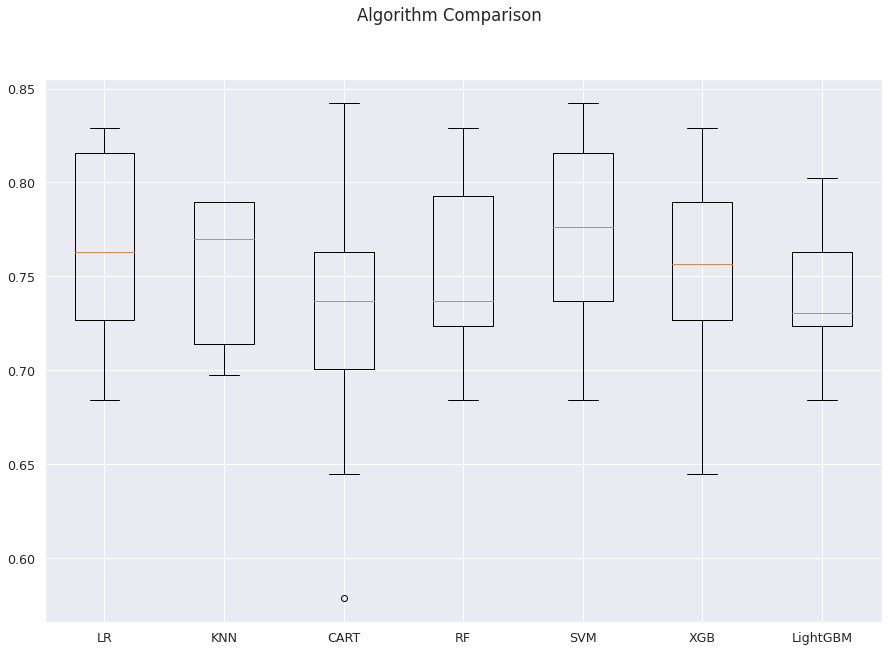

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = None)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# Algorithmic comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Model tuning**

**Random Forest Tuning**

In [ ]:
rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

In [ ]:
rf_model = RandomForestClassifier(random_state = 12345)

In [ ]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


In [ ]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_split': 10,
 'n_estimators': 200}

**Final model**

In [ ]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_)

In [ ]:
rf_tuned = rf_tuned.fit(X,y)

In [ ]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.7710526315789474

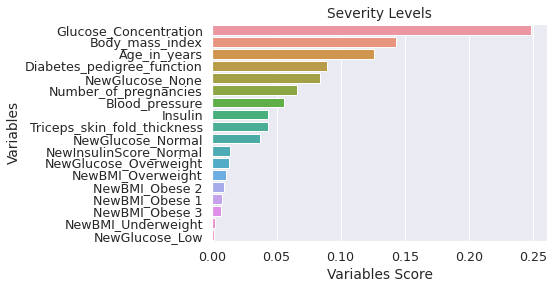

In [ ]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variables Score')
plt.ylabel('Variables')
plt.title("Severity Levels")
plt.show()

**LightGBM tuning**

In [ ]:
lgbm = LGBMClassifier(random_state = 12345)

In [ ]:
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.5],
              "n_estimators": [500, 1000, 1500],
              "max_depth":[3,5,8]}

In [ ]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


In [ ]:
gs_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

**Final model - LightGBM**

In [ ]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [ ]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.7592105263157896

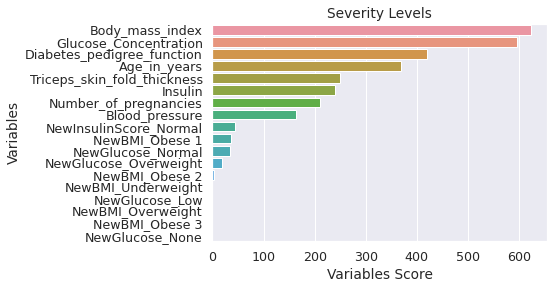

In [ ]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variables Score')
plt.ylabel('Variables')
plt.title("Severity Levels")
plt.show()

**XGboost tuning**

In [ ]:
xgb = GradientBoostingClassifier(random_state = 12345)

In [ ]:
xgb_params = {
    "learning_rate": [0.01, 0.1, 0.2, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 10),
    "max_depth":[3,5,8],
    "subsample":[0.5, 0.9, 1.0],
    "n_estimators": [100,1000]}

In [ ]:
xgb_cv_model  = GridSearchCV(xgb,
                            xgb_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2).fit(X, y)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


In [ ]:
xgb_cv_model.best_params_

{'learning_rate': 0.2,
 'max_depth': 5,
 'min_samples_split': 0.32222222222222224,
 'n_estimators': 100,
 'subsample': 1.0}

**Final model - XGBoost**

In [ ]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_).fit(X,y)

In [ ]:
cross_val_score(xgb_tuned, X, y, cv = 5).mean()

0.7842105263157895

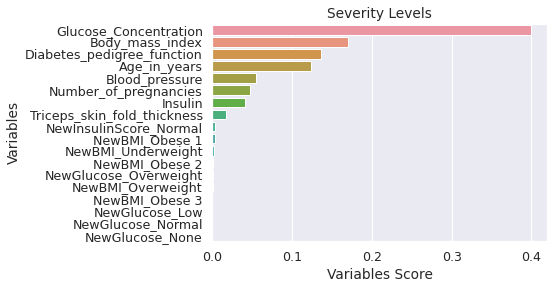

In [ ]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Variables Score')
plt.ylabel('Variables')
plt.title("Severity Levels")
plt.show()

**Comparing final models**

In [ ]:
models = []

models.append(('RF', RandomForestClassifier(random_state = 12345, max_depth = 8, max_features = 7, min_samples_split = 2, n_estimators = 500)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345, learning_rate = 0.1, max_depth = 5, min_samples_split = 0.1, n_estimators = 100, subsample = 1.0)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345, learning_rate = 0.01,  max_depth = 3, n_estimators = 1000)))

# Evaluation of all models
results = []
names = []

RF: 0.772368 (0.052318)
XGB: 0.752632 (0.041940)
LightGBM: 0.752632 (0.049861)


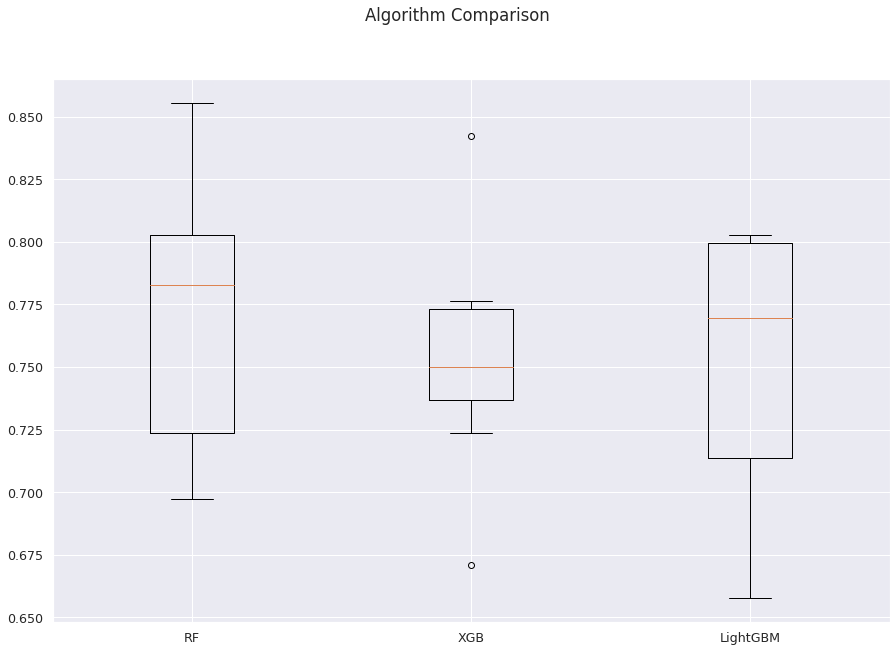

In [ ]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = None)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# Algorithmic comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Cleaning the data set**

In [ ]:
# Data cleaning - I chose here to use only entities that are float numbers
diabetes.columns
cols_to_norm = ['Number_of_pregnancies', 'Glucose_Concentration', 'Blood_pressure', 'Triceps_skin_fold_thickness', 'Insulin', 'Body_mass_index', 'Diabetes_pedigree_function'] 
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
diabetes[cols_to_norm].head()

,Number_of_pregnancies,Glucose_Concentration,Blood_pressure,Triceps_skin_fold_thickness,Insulin,Body_mass_index,Diabetes_pedigree_function
0,0.352941,0.670968,0.533333,0.500000,0.000000,0.373786,0.234415
1,0.058824,0.264516,0.466667,0.392857,0.000000,0.203883,0.116567
2,0.470588,0.896774,0.444444,0.000000,0.000000,0.123786,0.253629
3,0.058824,0.290323,0.466667,0.285714,0.282561,0.240291,0.038002
4,0.000000,0.600000,0.177778,0.500000,0.543929,0.604369,0.943638


**Training the models**

In [ ]:
# Defining pipelines in a list
mypipeline = [LogisticRegressionPipeline, DecisionTreePipeline, RandomForestPipeline]

In [ ]:
# Defining the variables so that I can choose the most optimal model
accuracy=0.0
classifier=0
pipeline=""

In [ ]:
# We created a dictionary of pipelines and training models
PipelineDict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest'}

# Matching pipelines
for mypipe in mypipeline:
    mypipe.fit(X_train, y_train)

In [ ]:
# Now I want to know the accuracy of all the classifiers
for i,model in enumerate(mypipeline):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.7171314741035857
Decision Tree Test Accuracy: 0.7091633466135459
Random Forest Test Accuracy: 0.7569721115537849


In [ ]:
# Choosing the best model for the data set
for i,model in enumerate(mypipeline):
    if model.score(X_test,y_test)>accuracy:
        accuracy=model.score(X_test,y_test)
        pipeline=model
        classifier=i
print('Classifier with best accuracy:{}'.format(PipelineDict[classifier]))

Classifier with best accuracy:Random Forest


In [ ]:
# Initializing Tensorflow and working on columns
num_preg = tf.feature_column.numeric_column('Number_of_pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose_Concentration')
blood_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps_skin_fold_thickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('Body_mass_index')
pedigree = tf.feature_column.numeric_column('Diabetes_pedigree_function')
age = tf.feature_column.numeric_column('Age_in_years')

In [ ]:
# I chose to group the ages in buckets
age_buckets = tf.feature_column.bucketized_column(age, boundaries = [20, 30, 40, 50, 60, 70, 80])
feat_cols = [num_preg, plasma_gluc, blood_press, tricep, insulin, bmi, pedigree, age_buckets]

In [ ]:
# Initialization of train and test commands
x_data = diabetes.drop('Outcome', axis = 1)
labels = diabetes['Outcome']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size = 0.33, random_state = 101)

In [ ]:
# Applying the input function
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_train, y = y_train, batch_size = 10, num_epochs = 1000, shuffle = True)

# Creating the model
model = tf.compat.v1.estimator.LinearClassifier(feature_columns = feat_cols, n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpodeoa3qc', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
model.train(input_fn = input_func, steps = 1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpodeoa3qc/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 6.931472, step = 0
INFO:tensorflow:global_step/sec: 323.595
INFO:tensorflow:loss = 4.9679756, step = 100 (0.318 sec)

**Predictions**

In [ ]:
# Prediction of diabetes patients
# 'classes':array([b'1']) = ill
# 'classes':array([b'0']) = healthy
pred_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 10, num_epochs = 1, shuffle = False)
predictions = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpodeoa3qc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.66223586], dtype=float32),
  'logits': array([0.6732739], dtype=float32),
  'probabilities': array([0.33776417, 0.66223586], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.20528278], dtype=float32),
  'logits': array([-1.3535981], dtype=float32),
  'probabilities': array([0.79471725, 0.20528275], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.28017223], dtype=float32),
  'logits': array([-0.94360757], dtype=float32),
  'probabilities': array([0.7198278, 0.2801722], dtype=float32)},


In [ ]:
# Evaluation of the model
eval_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_test, y = y_test, batch_size = 10, num_epochs = 1, shuffle = False)
results = model.evaluate(eval_input_func)
results

INFO:tensorflow:Calling model_fn.
Instructions for updating:
The value of AUC returned by this may race with the update so this is deprecated. Please use tf.keras.metrics.AUC instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-06-21T18:01:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpodeoa3qc/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 1.00419s
INFO:tensorflow:Finished evaluation at 2022-06-21-18:01:28
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7131474, accuracy_baseline = 0.6055777, auc = 0.8036616, auc_precision_recall = 0.6745898, average_loss = 0.5386388, global_step = 1000, label/mean = 0.39442232, loss = 5.199936, precision = 0.7076923, prediction/mean = 0.3482648, recall = 0.46464646
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpodeoa3qc/model.ckpt-1000


{'accuracy': 0.7131474,
 'accuracy_baseline': 0.6055777,
 'auc': 0.8036616,
 'auc_precision_recall': 0.6745898,
 'average_loss': 0.5386388,
 'global_step': 1000,
 'label/mean': 0.39442232,
 'loss': 5.199936,
 'precision': 0.7076923,
 'prediction/mean': 0.3482648,
 'recall': 0.46464646}